# Process:
    to identify unusual or unexpected patterns in search query data
    Gather historical search query data from the source, such as a search engine or a website’s search functionality.
        
        
Conduct an initial analysis to understand the distribution of search queries, their frequency, and any noticeable patterns or trends.        
        
Create relevant features or attributes from the search query data that can aid in anomaly detection        
        .
Choose an appropriate anomaly detection algorithm. Common methods include statistical approaches like Z-score analysis and machine learning algorithms like Isolation Forests or One-Class SV        
        M.
Train the selected model on the prepared da        
        ta.
Apply the trained model to the search query data to identify anomalies or outliers.


In [15]:
import pandas as pd

data = pd.read_csv('Queries.csv')
data

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02
2,python projects with source code,2077,73380,2.83%,5.94
3,classification report in machine learning,2012,4959,40.57%,1.28
4,the clever programmer,1931,2528,76.38%,1.09
...,...,...,...,...,...
995,human activity recognition python code,48,369,13.01%,6.53
996,python contact book project,48,334,14.37%,4.92
997,why standard scaler is used,48,295,16.27%,2.07
998,credit scoring machine learning python,48,243,19.75%,6.40


In [16]:
data.isnull().sum() # No Null Values

Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64

In [17]:
data.describe()

,Clicks,Impressions,Position
count,1000.0000,1000.000000,1000.000000
mean,172.2750,1939.466000,3.985930
std,281.0221,4856.702605,2.841842
min,48.0000,62.000000,1.000000
25%,64.0000,311.000000,2.010000
50%,94.0000,590.500000,3.120000
75%,169.0000,1582.750000,5.342500
max,5223.0000,73380.000000,28.520000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [19]:
# Converting CTR column to Percentage

data['CTR'] = data['CTR'].str.rstrip('%').astype(float) / 100

In [20]:
data

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
3,classification report in machine learning,2012,4959,0.4057,1.28
4,the clever programmer,1931,2528,0.7638,1.09
...,...,...,...,...,...
995,human activity recognition python code,48,369,0.1301,6.53
996,python contact book project,48,334,0.1437,4.92
997,why standard scaler is used,48,295,0.1627,2.07
998,credit scoring machine learning python,48,243,0.1975,6.40


In [25]:
import re
from collections import Counter
import plotly.express as px


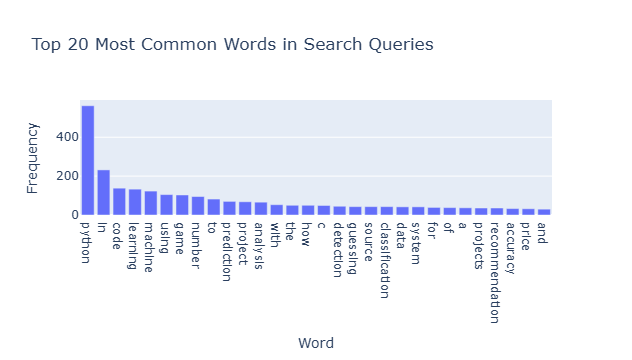

In [28]:
def clean_and_split(query): # function to clean/split search queries
    words = re.findall(r'\b[a-zA-Z]+\b', query.lower())  # Extracts only words (removes numbers & punctuation)
    return words  # return list of word

# re.findall(r'\b[a-zA-Z]+\b', query):
        # \b → Matches word boundaries (start & end of words).
        # [a-zA-Z]+ → Matches only alphabetic words 


# Split each query into words and count the frequency of each word
word_counts = Counter() # create counter object, which store word frequency
for query in data['Top queries']: #loop through each search query
    word_counts.update(clean_and_split(query)) # 

# converting the word count to a Dataframe
word_freq_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])
# return the top 20 most frequent words as list of tuples


# Plotting the word frequencies
fig = px.bar(word_freq_df, x='Word', y='Frequency', title='Top 20 Most Common Words in Search Queries')
fig.show()

# let’s have a look at the top queries by clicks and impressions:



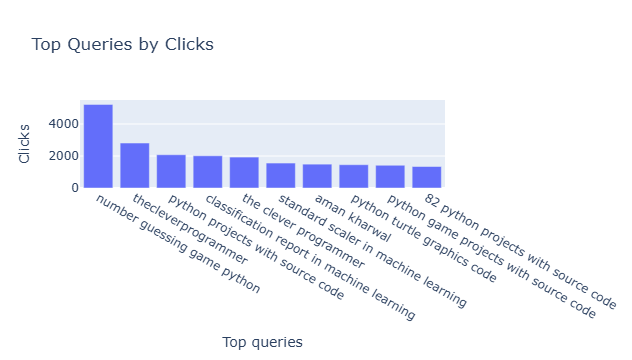

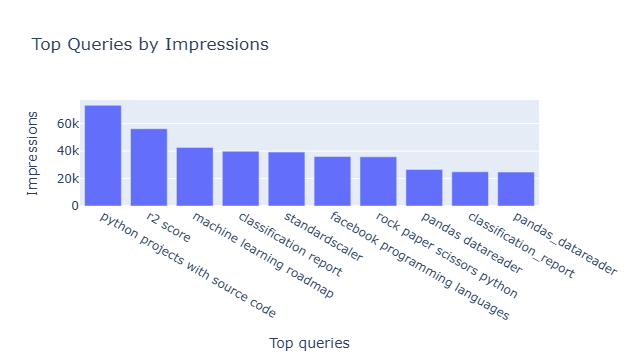

In [33]:
top_queries_clicks_vis = data.nlargest(10, 'Clicks')[['Top queries', 'Clicks']]
# top 10 rows based on the highest values in the 'Clicks' 
top_queries_impressions_vis = data.nlargest(10, 'Impressions')[['Top queries', 'Impressions']]


# Plotting
fig_clicks = px.bar(top_queries_clicks_vis, x='Top queries', y='Clicks', title='Top Queries by Clicks')
fig_impressions = px.bar(top_queries_impressions_vis, x='Top queries', y='Impressions', title='Top Queries by Impressions')
fig_clicks.show()
fig_impressions.show()

# let’s analyze the queries with the highest and lowest CTRs:

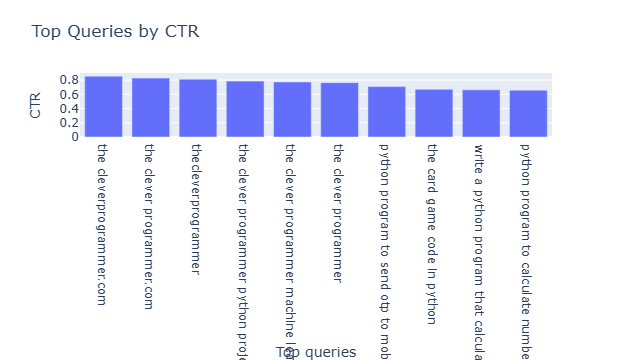

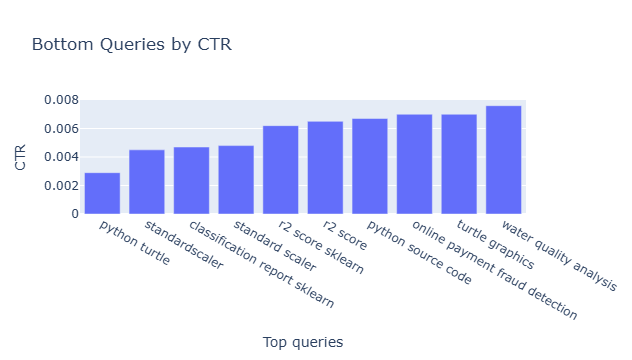

In [34]:
# Queries with highest and lowest CTR
top_ctr_vis = data.nlargest(10, 'CTR')[['Top queries', 'CTR']]
bottom_ctr_vis = data.nsmallest(10, 'CTR')[['Top queries', 'CTR']]

# Plotting
fig_top_ctr = px.bar(top_ctr_vis, x='Top queries', y='CTR', title='Top Queries by CTR')
fig_bottom_ctr = px.bar(bottom_ctr_vis, x='Top queries', y='CTR', title='Bottom Queries by CTR')
fig_top_ctr.show()
fig_bottom_ctr.show()

# correlation between different metrics:


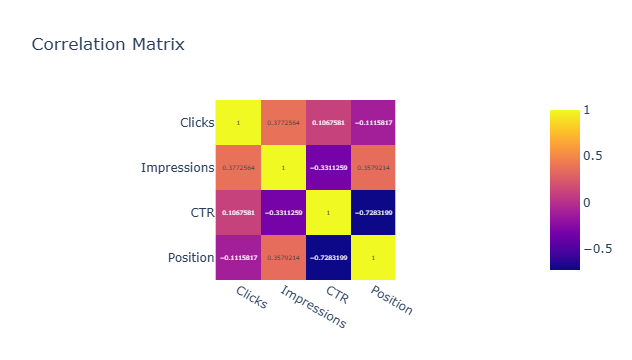

In [36]:
# Correlation matrix visualization
correlation_matrix = data[['Clicks', 'Impressions', 'CTR', 'Position']].corr()
fig_corr = px.imshow(correlation_matrix, text_auto=True, title='Correlation Matrix')
fig_corr.show()

# Detecting Anomalies in Search Queries


In [39]:
from sklearn.ensemble import IsolationForest

# Selecting relevant features
features = data[['Clicks', 'Impressions', 'CTR', 'Position']]

# Initializing Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01)  # contamination is the expected proportion of outliers
iso_forest

IsolationForest(contamination=0.01)

In [41]:
# Fitting the model
iso_forest.fit(features)

# Predicting anomalies
data['anomaly'] = iso_forest.predict(features)
data

,Top queries,Clicks,Impressions,CTR,Position,anomaly
0,number guessing game python,5223,14578,0.3583,1.61,-1
1,thecleverprogrammer,2809,3456,0.8128,1.02,-1
2,python projects with source code,2077,73380,0.0283,5.94,-1
3,classification report in machine learning,2012,4959,0.4057,1.28,1
4,the clever programmer,1931,2528,0.7638,1.09,-1
...,...,...,...,...,...,...
995,human activity recognition python code,48,369,0.1301,6.53,1
996,python contact book project,48,334,0.1437,4.92,1
997,why standard scaler is used,48,295,0.1627,2.07,1
998,credit scoring machine learning python,48,243,0.1975,6.40,1


In [47]:
# Filtering out the anomalies
anomalies = data[data['anomaly'] == -1]
anomalies

,Top queries,Clicks,Impressions,CTR,Position,anomaly
0,number guessing game python,5223,14578,0.3583,1.61,-1
1,thecleverprogrammer,2809,3456,0.8128,1.02,-1
2,python projects with source code,2077,73380,0.0283,5.94,-1
4,the clever programmer,1931,2528,0.7638,1.09,-1
21,classification report,933,39896,0.0234,7.53,-1
34,machine learning roadmap,708,42715,0.0166,8.97,-1
82,r2 score,367,56322,0.0065,9.33,-1
167,text to handwriting,222,11283,0.0197,28.52,-1
858,water quality analysis,56,7359,0.0076,27.56,-1
929,python turtle,52,18228,0.0029,18.75,-1


In [48]:
anomalies.shape

(10, 6)

# Analyze the detected anomalies to understand their nature and whether they represent true outliers or data errors:

In [50]:
anomalies[['Top queries', 'Clicks', 'Impressions', 'CTR', 'Position']].shape

(10, 5)

The anomalies in our search query data are not just outliers. They are indicators of potential areas for growth, optimization, and strategic focus. These anomalies are reflecting emerging trends or areas of growing interest. Staying responsive to these trends will help in maintaining and growing the website’s relevance and user engagement.

### Summary
So, Search Queries Anomaly Detection means identifying queries that are outliers according to their performance metrics. It is valuable for businesses to spot potential issues or opportunities, such as unexpectedly high or low CTRs. 